# Probabilidad y Estadística para IA. Ejercicios clase 2 (incompleto)

Nota: en Anaconda, usar octave-cli en lugar de octave:

~~~bash
export OCTAVE_EXECUTABLE=octave-cli
~~~

In [77]:
pkg load statistics;

### Ejercicio 1

Sean $X$, $Y$ dos v.a. distribuidas normalmente, con distribucion conjunta normal bivariable $f_{XY}$. Demostrar que $X$, $Y$ son independientes si y sólo si son v.a. descorrelacionadas (pista: usar $\rho = 0$ en $f_{XY}$ )

R:

Por definición, la distribución conjunta de dos variables independientes cumple la condición:

$$
f_{XY} = f_{X}f_{Y}
$$

Sean:

$$
z_X = \frac{x-\mu_X}{\sigma_X} \\
z_Y = \frac{y-\mu_Y}{\sigma_Y} \\
$$

las variables normalizadas que corresponden a $X$ e $Y$, se puede escribir la pdf conjunta de distribución normal variable:

$$
f_{XY}(x,y) = \frac{1}{2 \pi \sigma_X \sigma_Y \sqrt{1-\rho_{XY}^2} } e^{-\frac{1}{2(1-\rho_{XY}^2)}(z_{X}^2-2 \rho_{XY} z_X z_Y + z_{Y}^2)}
$$

Si el coeficiente de correlación $\rho = 0$ entonces queda:

$$
f_{XY}(x,y) = \frac{1}{2 \pi \sigma_X \sigma_Y 1 } e^{-\frac{1}{2}(z_{X}^2+ z_{Y}^2)}
$$

que puede reescribirse como:

$$
f_{XY}(x,y) = \frac{1}{\sqrt{2\pi}\sigma_X}e^{-\frac{1}{2z_X^2}} \frac{1}{\sqrt{2\pi}\sigma_Y}e^{-\frac{1}{2z_Y^2}}
$$

y finalmente:

$$
f_{XY}(x,y) = f_{X}f_{Y}
$$

### Ejercicio 2
Sean $X$,$Y$ dos v.a. normales de media cero correlacionadas con $\rho_{XY} = 0.5$. Se tiene que $var[X] = 2var[Y]=1$.
1. Encontrar la expresión de la pdf conjunta de $X$,$Y$.
2. Proyectar $x = [X Y]^T$ sobre $ \omega=[1  1]^T$ y encontrar la pdf de la proyección.

R:

1. 
$$
\sigma_X^2 = 2 \sigma_Y^2 = 1 \therefore \sigma_X = 1, \sigma_Y=\frac{1}{\sqrt(2)}
$$

In [78]:
sigma_x = 1;
sigma_y = 1/sqrt(2);
mu = [0 0];
rho = 0.5;
sigma = [sigma_x.^2 rho*sigma_x*sigma_y; rho*sigma_x*sigma_y sigma_y.^2];

In [79]:
X = mvnrnd(mu,sigma,(1000));

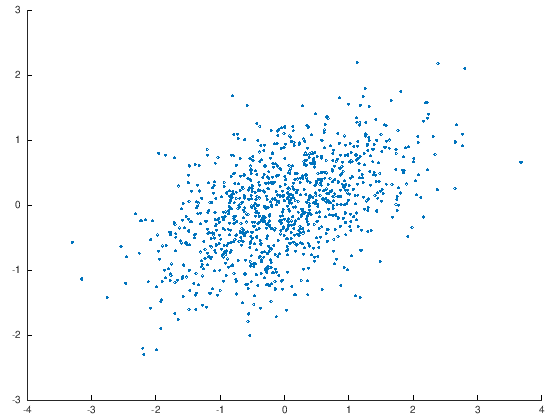

In [80]:
scatter(X(:,1),X(:,2))

2. 

$$
Z=\omega^Tx \sim \mathcal{N}(\omega^T\mu,\omega^T\Sigma\omega)
$$

In [81]:
w = [1;1];
mu_Z = w'*[0;0];
sigma_Z = w'*sigma*w % ver
Z = mvnrnd(mu_Z,sigma_Z,(1000));

sigma_Z =  2.2071


In [82]:
%scatter(Z(:,1),Z(:,2))

### Ejercicio 3
1. Usando el método de la transformada inversa, calcular la pdf de la distribución exponencial para:

$$
\begin{equation}
    f_Y(y) =
    \begin{cases}
       \lambda e^{- \lambda y}, & \text{ si } 0 \le y \le 1\\
      0, & \text{ si } y = 0 \\
    \end{cases}
  \end{equation}
$$

Usar un valor arbitrario de λ > 0.

Respuesta:

$$
F_Y(y) = P(Y\le y) = \int_{-\infty}^{y} f_Y(t) dt = 1 - e^{- \lambda y} 
$$

$$
X = F_y^{-1}(U) \therefore U = F_Y(Y) \therefore U = 1-e^{- \lambda y} 
$$

$$
e^{- \lambda y} = 1 - U
$$

$$
{- \lambda y} = ln(1 - U)
$$

$$
Y = \frac{-ln(1-U)}{\lambda}
$$

2. Simular en Octave.

In [83]:
function samples = exp_rv(l, n_samples)
    u = unifrnd(0,1,n_samples,1);
    samples = -log(1-u)/l;
endfunction

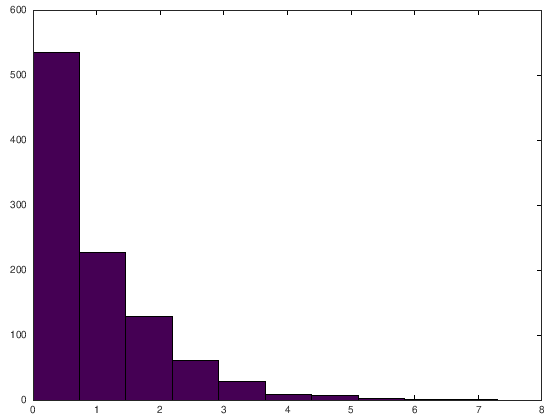

In [84]:
N_SAMPLES = 1000;
series = exp_rv(1,N_SAMPLES);
hist(series);

### Ejercicio 4

Sea $x = (X_1, X_2) \in \mathbb{R}$ un vector de v.a.
Definamos $y=T(x)$, con $T=(g_1(x_1, x_2), g_2 (x_1, x_ 2)) \in \mathbb{R}^2$, con $g_1$ , $g_2$ diferenciables.
1. Encontrar la expresión de la pdf del vector transformado y en función de $f_{X_1X_2}$
2. Resolver la pdf de y para el caso del vector $x$ del Ejercicio 2 con:
$$
T = 
\begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}\\
$$
y simular en Octave.

R: Ver.